In [1]:
# from helper_functions import plot_loss_curves, plot_all_loss_curves
from dataloaders import engine
import matplotlib.pyplot as plt
import os

DICT_PATH = "C:/Users/kumar/University of Hartford/Thesis/models/visiontransformer"

In [2]:
def plot_all_loss_curves(results, names, dim):
    """Plots training curves of all the dictionaries with a dictionary.

    Args:
        results (dict): dictionary of multiple dictionaries containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    fig = plt.figure(figsize=(15, 7))

    plt.subplot(2, 2, 1)

    markers = ["o","^","X","D", "s","p","P","*","h","v"]
    i = 0
    for res in results:
        shape = markers[i]
        loss = res["train_loss"]
        test_loss = res["test_loss"]

        epochs = range(len(res["train_loss"]))

        plt.plot(epochs, loss, shape, label="train_loss")
#         plt.plot(epochs, test_loss, label="test_loss")
        i += 1

    plt.title("Train Loss")
    plt.xlabel("Epochs")
    plt.axis([-0.5, dim, 0.3, 1.8])
    plt.legend(names)
    fig.tight_layout(pad=3.0)

    plt.subplot(2, 2, 2)

    i = 0
    for res in results:
        shape = markers[i]
        i += 1
        accuracy = res["train_acc"]
        test_accuracy = res["test_acc"]

        epochs = range(len(res["train_loss"]))

        plt.plot(epochs, accuracy, shape, label="train_accuracy")
#         plt.plot(epochs, test_accuracy, label="test_accuracy")

    plt.title("Train Accuracy")
    plt.axis([-0.5, dim, 0.45, 0.9])
    plt.xlabel("Epochs")
    plt.legend(names)
    fig.tight_layout(pad=3.0)

    plt.subplot(2, 2, 3)

    i = 0
    for res in results:
        shape = markers[i]
        i += 1
        loss = res["train_loss"]
        test_loss = res["test_loss"]

        epochs = range(len(res["train_loss"]))

#         plt.plot(epochs, loss, label="train_loss")
        plt.plot(epochs, test_loss, shape, label="test_loss")

    plt.title("Test Loss")
    plt.axis([-0.5, dim, 0.7, 1.5])
    plt.xlabel("Epochs")
    plt.legend(names)
    fig.tight_layout(pad=3.0)

    plt.subplot(2, 2, 4)

    i = 0
    for res in results:
        shape = markers[i]
        i += 1
        accuracy = res["train_acc"]
        test_accuracy = res["test_acc"]

        epochs = range(len(res["train_loss"]))

#         plt.plot(epochs, accuracy, label="train_accuracy")
        plt.plot(epochs, test_accuracy, shape, label="test_accuracy")

    plt.title("Test Accuracy")
    plt.axis([-0.5, dim, 0.45, 0.75])
    plt.xlabel("Epochs")
    plt.legend(names)
    fig.tight_layout(pad=3.0)

In [3]:
def get_results(path:str, filename:str):
    results = []
    names = []
    for file in os.listdir(path):
        if file.endswith(filename):
            path = os.path.join(DICT_PATH, file)
            res = engine.load_results(path)
            results.append(res)
            names.append(file)
    return results, names



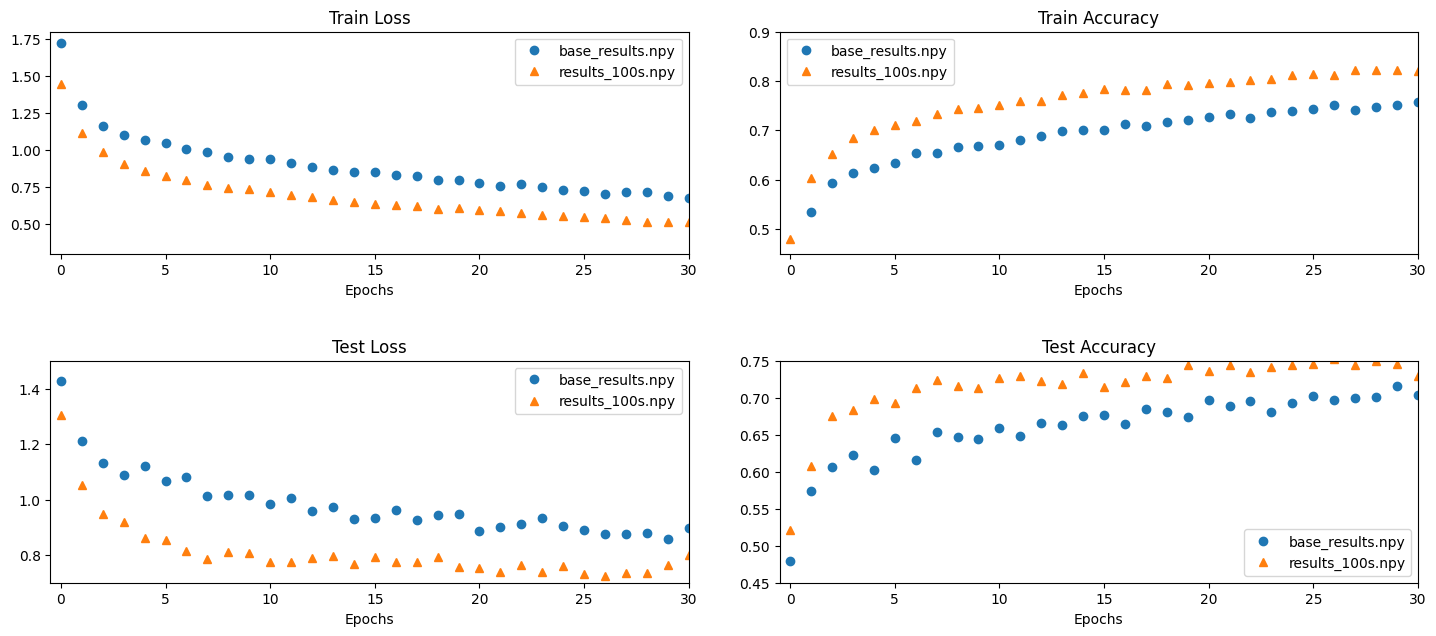

In [51]:
dimensions  = [-0.5, 50, 0.3, 1.8]

results, names = get_results(DICT_PATH, "s.npy")
names.append(names.pop(1))
results.append(results.pop(1))

plot_all_loss_curves(results, names, 30)

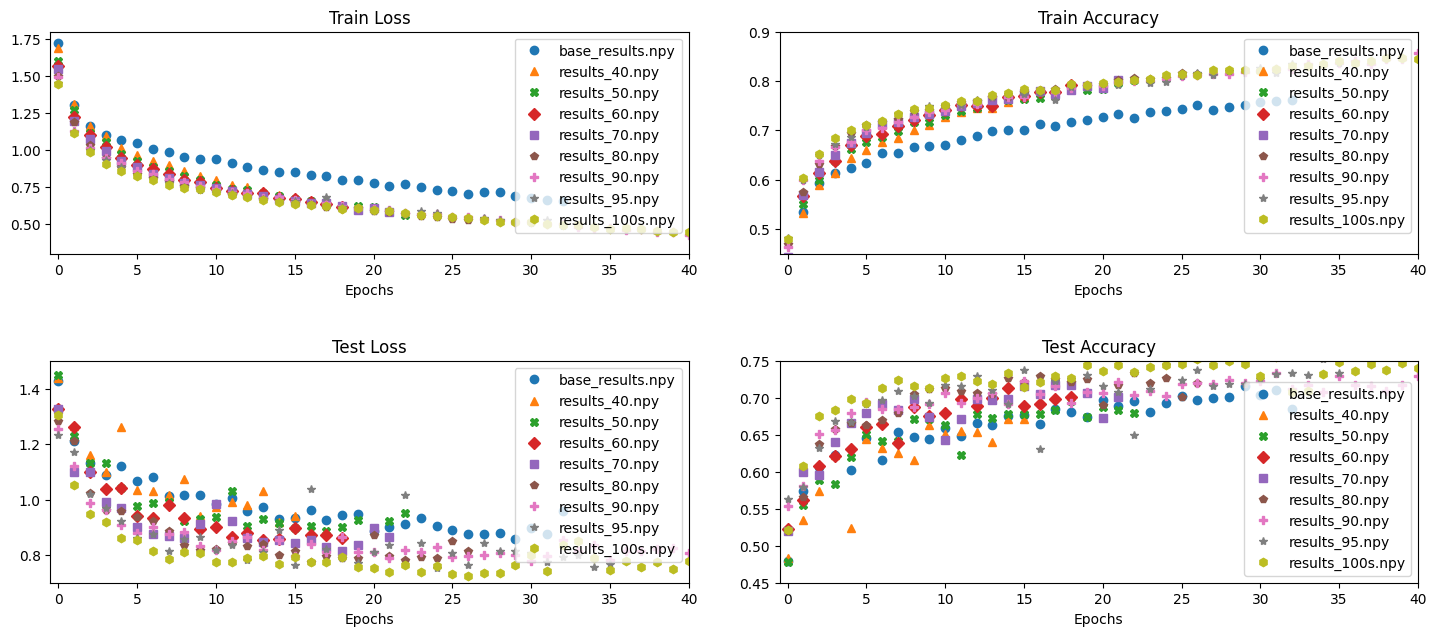

In [52]:
results, names = get_results(DICT_PATH, ".npy")
names.append(names.pop(1))
results.append(results.pop(1))

plot_all_loss_curves(results, names, 40)

In [38]:
results.append(results.pop(1))

In [37]:
names.append(names.pop(1))
print(names)

['base_results.npy', 'results_40.npy', 'results_50.npy', 'results_60.npy', 'results_70.npy', 'results_80.npy', 'results_90.npy', 'results_95.npy', 'results_100s.npy']


In [22]:
def get_max(col:str):
    max_results = []
    for i in range(len(names)):
        maximum = 0
        for j in results[i][col]:
            if maximum < j:
                maximum = j
            else:
                continue
        max_results.append(maximum)
        print(col + " for " + names[i] + ": " + str(maximum))
    return max_results
        
        
def get_min(col:str):
    min_results = []
    for i in range(len(names)):
        minimum = 10
        for j in results[i][col]:
            if minimum > j:
                minimum = j
            else:
                continue
        min_results.append(minimum)
        print(col + " for " + names[i] + ": " + str(minimum))
    return min_results

In [39]:
train_acc_max = get_max('train_acc')
print('-'*50)
test_acc_max = get_max('test_acc')

train_acc for base_results.npy: 0.7618739737274219
train_acc for results_40.npy: 0.7695070733863838
train_acc for results_50.npy: 0.8028956422018348
train_acc for results_60.npy: 0.7919859514687101
train_acc for results_70.npy: 0.8015163934426229
train_acc for results_80.npy: 0.8167758068081344
train_acc for results_90.npy: 0.8568312268089054
train_acc for results_95.npy: 0.8370320048309179
train_acc for results_100s.npy: 0.8657806513409961
--------------------------------------------------
test_acc for base_results.npy: 0.7162652905198778
test_acc for results_40.npy: 0.6713068181818183
test_acc for results_50.npy: 0.6960227272727273
test_acc for results_60.npy: 0.7127525252525252
test_acc for results_70.npy: 0.7175324675324676
test_acc for results_80.npy: 0.7333096590909091
test_acc for results_90.npy: 0.7333120748299319
test_acc for results_95.npy: 0.7519646819526626
test_acc for results_100s.npy: 0.7552834207077327


In [40]:
train_loss_min = get_min('train_loss')
print('-'*50)
test_loss_min = get_min('test_loss')

train_loss for base_results.npy: 0.6556329870874854
train_loss for results_40.npy: 0.6786356828678614
train_loss for results_50.npy: 0.5605085779220687
train_loss for results_60.npy: 0.6134474849563906
train_loss for results_70.npy: 0.5795844420057829
train_loss for results_80.npy: 0.5280912221334446
train_loss for results_90.npy: 0.42391465862794797
train_loss for results_95.npy: 0.4677186825353166
train_loss for results_100s.npy: 0.3846091072963572
--------------------------------------------------
test_loss for base_results.npy: 0.8565290406893152
test_loss for results_40.npy: 0.9200423221019182
test_loss for results_50.npy: 0.8877757695588199
test_loss for results_60.npy: 0.8540962723394235
test_loss for results_70.npy: 0.8129433110936896
test_loss for results_80.npy: 0.7734562087465416
test_loss for results_90.npy: 0.7797408298570283
test_loss for results_95.npy: 0.7547923524219257
test_loss for results_100s.npy: 0.7225220018160452


In [42]:
for i in range(len(names)):
    print("Name: " + names[i] + "; Test Acc: " + str(test_acc_max[i]))

Name: base_results.npy; Test Acc: 0.7162652905198778
Name: results_40.npy; Test Acc: 0.6713068181818183
Name: results_50.npy; Test Acc: 0.6960227272727273
Name: results_60.npy; Test Acc: 0.7127525252525252
Name: results_70.npy; Test Acc: 0.7175324675324676
Name: results_80.npy; Test Acc: 0.7333096590909091
Name: results_90.npy; Test Acc: 0.7333120748299319
Name: results_95.npy; Test Acc: 0.7519646819526626
Name: results_100s.npy; Test Acc: 0.7552834207077327


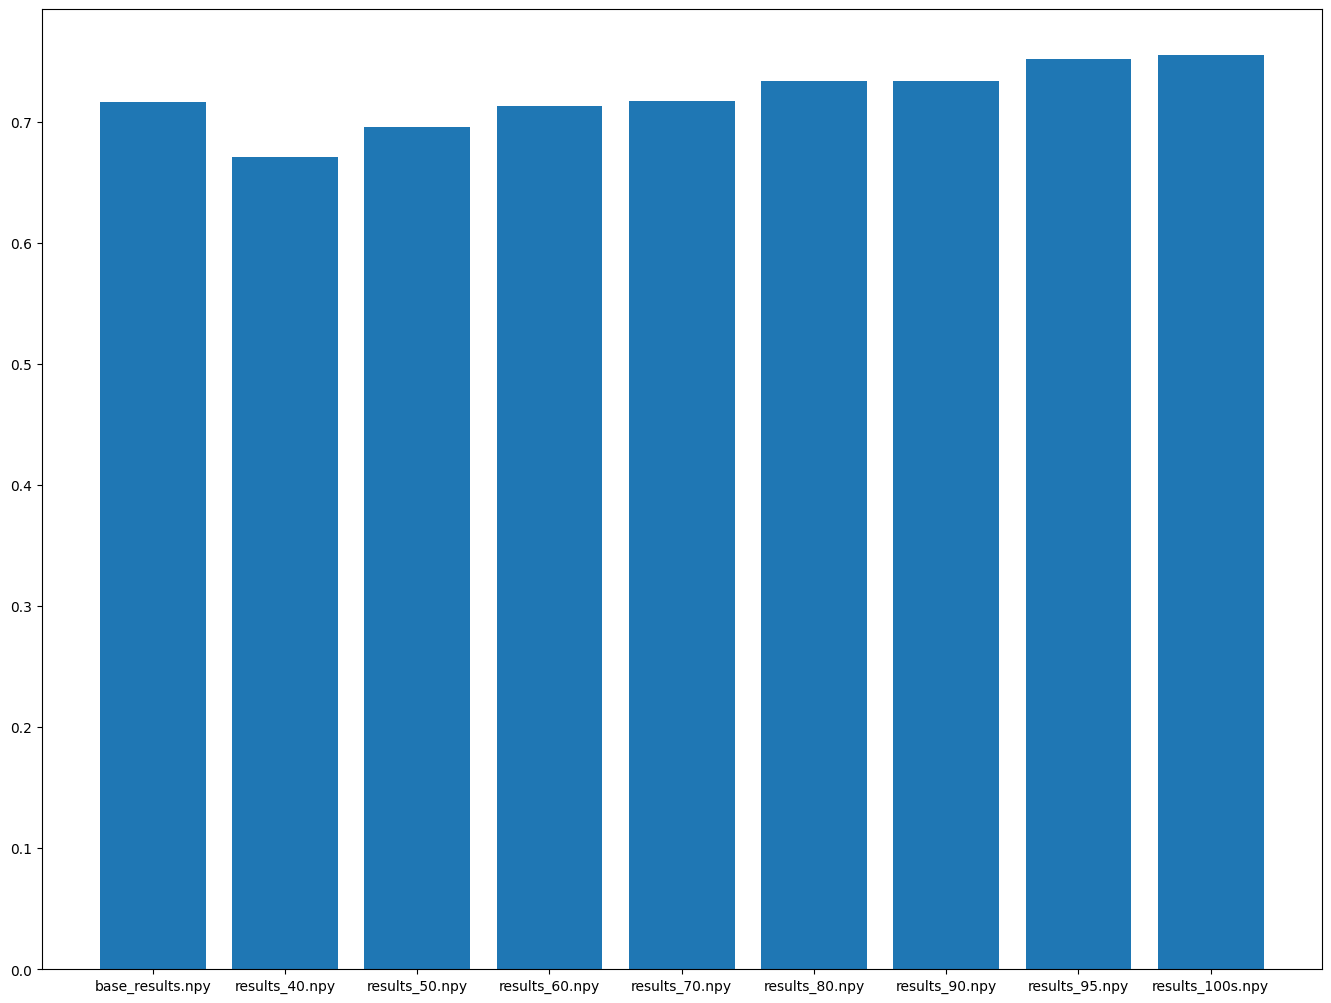

In [49]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
ax.bar(names,test_acc_max)
plt.show()